In [26]:
import torch as tr
import torchvision as tv
import torch.nn as nn
import torch.nn.functional as F

In [27]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
mnist = tv.datasets.mnist.MNIST("./.datsets/mnist")

In [30]:
x,y = mnist.train_data,mnist.train_labels

In [31]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [32]:
net = Net()

In [39]:
params = list(net.parameters())

In [40]:
len(params)

10

In [42]:
params[0].shape

torch.Size([6, 1, 3, 3])

In [43]:
i = tr.randn(1,1,32,32)

In [49]:
net(i)

tensor([[-0.0804, -0.0450, -0.0170, -0.0418,  0.0649, -0.0109, -0.0548,  0.1030,
          0.0690, -0.0529]], grad_fn=<AddmmBackward>)

In [50]:
output = net(i)

In [51]:
target = tr.randn(10)

In [52]:
target = target.view(1,-1)

In [55]:
criterion = nn.MSELoss()

In [56]:
loss = criterion(output,target)

In [57]:
loss

tensor(1.2666, grad_fn=<MseLossBackward>)

In [60]:
loss.grad_fn

In [63]:
loss.grad_fn.next_functions[0][0].next_functions[0][0]

In [64]:
net.zero_grad()

In [65]:
net.conv1.bias.grad

In [66]:
loss.backward()

In [67]:
net.conv1.bias.grad

tensor([ 0.0025,  0.0024,  0.0027, -0.0130, -0.0051, -0.0036])

In [68]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [70]:
optim = tr.optim.Adam(net.parameters())

In [71]:
optim.zero_grad()

In [74]:
output = net(i)
loss = criterion(output, target)
loss.backward()
optim.step()  

In [80]:
transform = tv.transforms.Compose(
    [tv.transforms.ToTensor(),
     tv.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = tv.datasets.CIFAR10(root='./.datasets/CIFAR10', train=True,
                                        download=True, transform=transform)

trainloader = tr.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = tv.datasets.CIFAR10(root='./.datasets/CIFAR10', train=False,
                                       download=True, transform=transform)
testloader = tr.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./.datasets/CIFAR10/cifar-10-python.tar.gz to ./.datasets/CIFAR10
Files already downloaded and verified


In [85]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [86]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

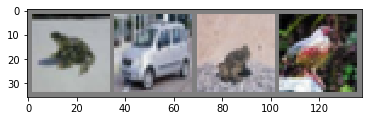

In [95]:
imshow(tv.utils.make_grid(images))

In [96]:
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

 frog   car  frog  bird


In [97]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [98]:
criterion = nn.CrossEntropyLoss()
optimizer = tr.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [100]:
from tqdm.notebook import tqdm

In [99]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

KeyboardInterrupt: 